<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Interaction-Data" data-toc-modified-id="Load-Interaction-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Interaction Data</a></span></li><li><span><a href="#Process-Chemical-Gene,-Gene-Disease-and-Chemical-Disease-Relations" data-toc-modified-id="Process-Chemical-Gene,-Gene-Disease-and-Chemical-Disease-Relations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Process Chemical-Gene, Gene-Disease and Chemical-Disease Relations</a></span><ul class="toc-item"><li><span><a href="#Extract-and-index-chemical-gene-interaction-labels" data-toc-modified-id="Extract-and-index-chemical-gene-interaction-labels-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Extract and index chemical-gene interaction labels</a></span></li><li><span><a href="#Issue-data" data-toc-modified-id="Issue-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Issue data</a></span></li><li><span><a href="#Screen-gene-disease-with-evidence-and-inference-score" data-toc-modified-id="Screen-gene-disease-with-evidence-and-inference-score-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Screen gene-disease with evidence and inference score</a></span></li><li><span><a href="#Screen-chemical-disease-with-evidence-and-inference-score" data-toc-modified-id="Screen-chemical-disease-with-evidence-and-inference-score-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Screen chemical-disease with evidence and inference score</a></span></li><li><span><a href="#Index-unique-chemicals,-genes-and-diseases" data-toc-modified-id="Index-unique-chemicals,-genes-and-diseases-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Index unique chemicals, genes and diseases</a></span></li></ul></li><li><span><a href="#Graph-Construction" data-toc-modified-id="Graph-Construction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Graph Construction</a></span><ul class="toc-item"><li><span><a href="#The-chemical-gene-interaction-subgraph" data-toc-modified-id="The-chemical-gene-interaction-subgraph-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The chemical-gene interaction subgraph</a></span></li><li><span><a href="#The-gene-disease-association-subgraph" data-toc-modified-id="The-gene-disease-association-subgraph-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The gene-disease association subgraph</a></span></li><li><span><a href="#The-chemical-disease-association-subgraph" data-toc-modified-id="The-chemical-disease-association-subgraph-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>The chemical-disease association subgraph</a></span></li></ul></li><li><span><a href="#Graph-Analysis" data-toc-modified-id="Graph-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Graph Analysis</a></span></li></ul></div>

<IPython.core.display.Javascript object>


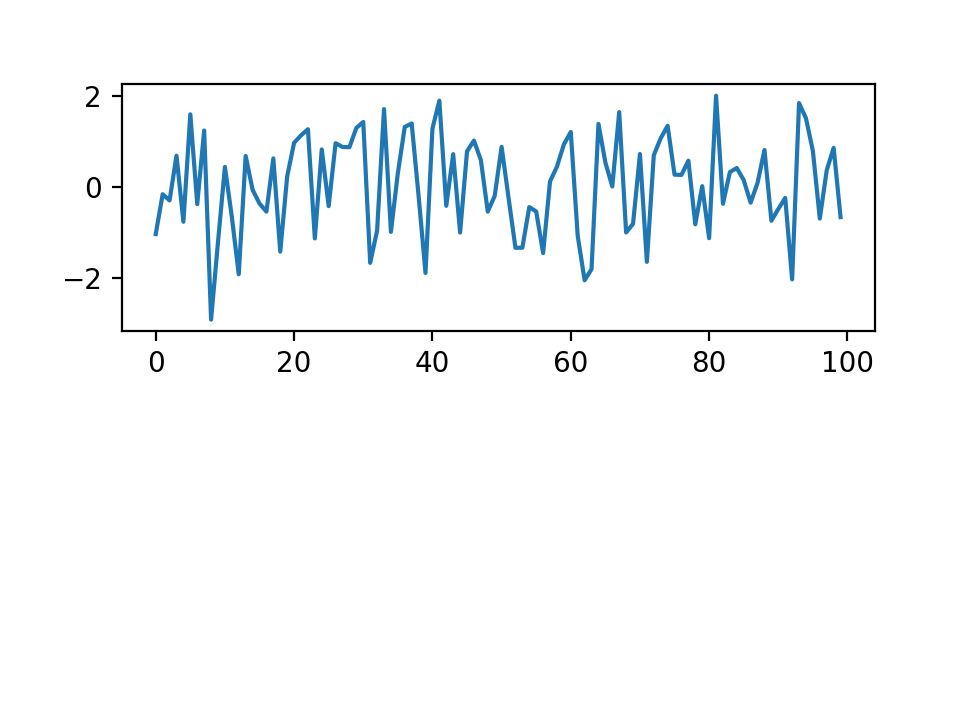

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(211)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()
#     time.sleep(1)

In [1]:
import pandas as pd
import os.path as path
import numpy as np

root = "./raw_data"

## Load Interaction Data

In [2]:
chem_gene = pd.read_csv(path.join(root, "CTD_chem_gene_ixns.csv"),
                        header=None,
                        skiprows=range(29),
                        usecols=[1, 4, 9]).to_numpy()
chem_dise = pd.read_csv(path.join(root, "CTD_chemicals_diseases.csv"),
                        header=None,
                        skiprows=range(29),
                        usecols=[1, 4, 7]).to_numpy()
gene_dise = pd.read_csv(path.join(root, "CTD_genes_diseases.csv"),
                        header=None,
                        skiprows=range(29),
                        usecols=[1, 3, 6]).to_numpy()

In [3]:
chem_gene[:5, :]

array([['C534883', 367, 'affects^reaction|increases^expression'],
       ['C534883', 367, 'decreases^reaction|increases^expression'],
       ['C534883', 367, 'decreases^expression'],
       ['C534883', 367, 'decreases^expression'],
       ['C534883', 2048, 'decreases^reaction|increases^expression']],
      dtype=object)

In [4]:
chem_dise[:5, :]

array([['C046983', 'MESH:D054198', nan],
       ['C534883', 'MESH:D000230', 4.08],
       ['C534883', 'MESH:D000077192', 4.32],
       ['C534883', 'MESH:D000505', 4.51],
       ['C534883', 'MESH:D013734', 6.85]], dtype=object)

In [6]:
gene_dise[:5, :]

array([[100174880, 'MESH:D000014', 5.2],
       [100174880, 'MESH:D000740', 4.24],
       [100174880, 'MESH:D000743', 4.54],
       [100174880, 'MESH:D053627', 5.11],
       [100174880, 'MESH:D001724', 5.72]], dtype=object)

## Process Chemical-Gene, Gene-Disease and Chemical-Disease Relations

In [ ]:
# initialization
chem_map, gene_map, dise_map, chem_gene_label_map = dict(), dict(), dict(), dict()
chem_gene_dict = dict()  # (chem, gene) : {labels}
chem_gene_sp, gene_dise_sp, chem_dise_sp = [], [], []

### Extract and index chemical-gene interaction labels

In [8]:
for c, g, l in chem_gene:
    if chem_map.get(c) == None:
        chem_map[c] = len(chem_map)
        
    if gene_map.get(g) == None:
        gene_map[g] = len(gene_map)
        
    c, g = chem_map[c], gene_map[g]
        
    if chem_gene_dict.get((c, g)) == None:
        chem_gene_dict[(c, g)] = set()
        
    ls = l.split('|')
    for l in ls:
        if chem_gene_label_map.get(l) == None:
            chem_gene_label_map[l] = len(chem_gene_label_map)
#         chem_gene_dict[(c, g)].add(chem_gene_label_map[l])
        chem_gene_dict[(c, g)].add(l)

In [9]:
print(len(chem_map))
print(len(gene_map))
print(len(chem_gene_dict))
print(len(chem_gene_label_map))

13571
50917
1174560
134


### Issue data

- co-occurences of specific and general interacions
- contradictions between specific interactions

In [10]:
# an example of issue data
chem_gene_dict[(0, 0)]

{'affects^reaction',
 'decreases^expression',
 'decreases^reaction',
 'increases^expression'}

In [11]:
relations = sum([len(i) for i in chem_gene_dict.values()])

In [12]:
count_i, count_d, count_c, count_t = 0, 0, 0, 0
count_ri, count_rd, count_rc, count_rt = 0, 0, 0, 0
count_n, count_ns, count_ng = 0, 0, 0

for vs in chem_gene_dict.values():
    tmp = dict()
    too = 0
    for v in list(vs):
        w = v.split('^')
        if tmp.get(w[0]) == None:
            tmp[w[0]] = {w[1]}
        else:
            tmp[w[0]].add(w[1])            
    if tmp.get('affects') != None:
        count_ng += len(tmp['affects'])
    if tmp.get('increases') != None:
        count_ns += len(tmp['increases'])
        if tmp.get('affects') != None:
            a = len(tmp['increases'] & tmp['affects'])
            if a:
                count_i += 1
                count_ri += a
                count_ns -= a
                count_ng -= a
                too += 1
    if tmp.get('decreases') != None:
        count_ns += len(tmp['decreases'])
        if tmp.get('affects') != None:
            a = len(tmp['decreases'] & tmp['affects'])
            if a:
                count_d += 1
                count_rd += a
                count_ns -= a
                count_ng -= a
                if too == 0:
                    too += 1                    
    if tmp.get('increases') != None and tmp.get('decreases') != None:
        a = len(tmp['increases'] & tmp['decreases'])
        if a:
            count_c += 1
            count_rc += a
            count_ns -= a
            too += 1
    if too > 1:
        count_t += 1
    
count_n = relations - count_rc - count_ri + count_t

In [13]:
print("Issue interactions:")
print("{:0.2f}% ({:d}/{:d}) chem_gene pairs or {:0.2f}% ({:d}/{:d}) their interactions contain 'general-specific' issue".format((count_i + count_d)/len(chem_gene_dict)*100, (count_i + count_d), len(chem_gene_dict), (count_ri + count_rd)/relations*200, (count_ri + count_rd), relations))
print("{:0.2f}% ({:d}/{:d}) chem_gene pairs or {:0.2f}% ({:d}/{:d}) their interactions contain 'contradiction' issue".format(count_c/len(chem_gene_dict)*100, count_c, len(chem_gene_dict), count_rc/relations*200, count_rc*2, relations))
print("{:0.2f}% ({:d}/{:d}) chem_gene pairs contain both two issues".format(count_t/len(chem_gene_dict)*100, count_t, len(chem_gene_dict)))
print()
print("In relationships that don't have any problems:")
print("{:0.2f}% ({:d}/{:d}) chem_gene interactions are specific interactions".format(count_ns/relations*100, count_ns, relations))
print("{:0.2f}% ({:d}/{:d}) chem_gene interactions are general interactions".format(count_ng/relations*100, count_ng, relations))

Issue interactions:
6.43% (75555/1174560) chem_gene pairs or 8.90% (80632/1812566) their interactions contain 'general-specific' issue
6.73% (79104/1174560) chem_gene pairs or 9.80% (177676/1812566) their interactions contain 'contradiction' issue
1.59% (18650/1174560) chem_gene pairs contain both two issues

In relationships that don't have any problems:
65.82% (1193032/1812566) chem_gene interactions are specific interactions
20.38% (369432/1812566) chem_gene interactions are general interactions


### Screen gene-disease with evidence and inference score

In [15]:
gene_dise[:10]

array([[100174880, 'MESH:D000014', 5.2],
       [100174880, 'MESH:D000740', 4.24],
       [100174880, 'MESH:D000743', 4.54],
       [100174880, 'MESH:D053627', 5.11],
       [100174880, 'MESH:D001724', 5.72],
       [100174880, 'MESH:D001943', 8.73],
       [100174880, 'MESH:D001943', 8.73],
       [100174880, 'MESH:D002471', 4.24],
       [100174880, 'MESH:D002869', 4.69],
       [100174880, 'MESH:D003643', 4.84]], dtype=object)

In [ ]:
# For curated association


### Screen chemical-disease with evidence and inference score

### Index unique chemicals, genes and diseases

## Graph Construction

### The chemical-gene interaction subgraph

### The gene-disease association subgraph

### The chemical-disease association subgraph

## Graph Analysis

### 

### 